In [19]:
import gps_particle_data_modified as gps_particle_data
import wget
import os
import numpy as np 
import time
import json
import sys
import math
import pickle
from datetime import datetime, timedelta, date
from itertools import compress
from random import randint
import urllib2
import aacgmv2
import scipy
import matplotlib
from matplotlib import gridspec
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
#Collecting data and avoiding nuclear tests for all the months in 2014 and 2015

start_date = datetime(2014,1,1,0,0,0);
end_date = datetime(2014,8,31,0,0,0);
nkstart_date = datetime(2009,5,20,0,0,0);
nkend_date = datetime(2009,5,26,0,0,0);
#end_date = datetime(2014,1,5,0,0,0);
satellite_numbers = {54}
ms = gps_particle_data.meta_search(satellite_numbers);
nkms = gps_particle_data.meta_search(satellite_numbers);
#Time Running of download state
dlstart = datetime.now()
ms.load_data(start_date,end_date);
nkms.load_data(nkstart_date,nkend_date)
dlfin = datetime.now()
print ("Seconds elapsed:" + str((dlfin-dlstart).total_seconds()))
output_data = ms.get_all_data_by_satellite()
nkoutput_data = nkms.get_all_data_by_satellite()
signal = 'rate_electron_measured'
#For all channels (including ch2 as check)
for satnumber in satellite_numbers:
    for channel in range(11):
        esignaloutput = np.asarray(output_data[satnumber][signal])[:,channel]
        #Normalised cross-correlation between channel 2 and all other channels for a given time period.
#       cor = np.correlate(a0, ar2)/(math.sqrt(np.sum(a0**2)*np.sum(ar2**2)))
        fname = 'gareth/full_data/ch2_'+str(channel)+'.npy'
        with open(fname, 'a') as f:
            np.save(f, esignaloutput)
            print 'Saved channel:', channel
            print esignaloutput
print "Finished Successfully"


Loading data for satellite  54
File : https://www.ngdc.noaa.gov/stp/space-weather/satellite-data/satellite-systems/gps/data/ns54/ns54_140105_v1.03.ascii
File : https://www.ngdc.noaa.gov/stp/space-weather/satellite-data/satellite-systems/gps/data/ns54/ns54_140112_v1.03.ascii
File : https://www.ngdc.noaa.gov/stp/space-weather/satellite-data/satellite-systems/gps/data/ns54/ns54_140119_v1.03.ascii
File : https://www.ngdc.noaa.gov/stp/space-weather/satellite-data/satellite-systems/gps/data/ns54/ns54_140126_v1.03.ascii
File : https://www.ngdc.noaa.gov/stp/space-weather/satellite-data/satellite-systems/gps/data/ns54/ns54_140202_v1.03.ascii
File : https://www.ngdc.noaa.gov/stp/space-weather/satellite-data/satellite-systems/gps/data/ns54/ns54_140209_v1.03.ascii
File : https://www.ngdc.noaa.gov/stp/space-weather/satellite-data/satellite-systems/gps/data/ns54/ns54_140216_v1.03.ascii
File : https://www.ngdc.noaa.gov/stp/space-weather/satellite-data/satellite-systems/gps/data/ns54/ns54_140223_v1.0

In [3]:
for key, value in output_data[54].iteritems() :
    print key

b_sattelite
proton_density_fit
L_LGM_TS04IGRF
b_coord_radius
electron_diff_flux
proton_background
datetime
L_LGM_OP77IGRF
integral_flux_instrument
model_counts_proton_fit_pf
year
proton_fluence_fit
proton_flux_fit
b_coord_height
LEP_thresh
electron_background
rate_proton_measured
Geographic_Latitude
L_LGM_T89CDIP
Geographic_Longitude
decimal_year
pfitpars
utc_lgm
electron_diff_flux_energy
magnetic_longitude
L_shell
bfield_ratio
electron_density_fit
model_counts_electron_fit_pf
Rad_Re
proton_integrated_flux_fit
decimal_day
svn_number
rate_electron_measured
integral_flux_energy
efitpars
dropped_data
proton_temperature_fit
L_LGM_T89IGRF
local_time
b_equator
model_counts_proton_fit
proton_activity
electron_temperature_fit
model_counts_electron_fit
collection_interval


In [4]:
#with open('gareth/full_data/dataset.pkl','wb+') as f:
    #pickle.dump(output_data,f,pickle.HIGHEST_PROTOCOL)

In [45]:
import xcorrobj
reload(xcorrobj)
background = xcorrobj.crosscorrelator()
nkevent = xcorrobj.crosscorrelator()
#background.add_correlation_data_channel(0,chsignal)
signal = 'rate_electron_measured'
background.add_all_signals(output_data,54,signal)
background.add_time_data(output_data[54]['datetime'][:])
nkevent.add_all_signals(nkoutput_data,54,signal)
nkevent.add_time_data(nkoutput_data[54]['datetime'][:])

<type 'int'>
<type 'int'>
<type 'int'>
<type 'int'>
<type 'int'>
<type 'int'>
<type 'int'>
<type 'int'>
<type 'int'>
<type 'int'>
<type 'int'>
<type 'int'>
<type 'int'>
<type 'int'>
<type 'int'>
<type 'int'>
<type 'int'>
<type 'int'>
<type 'int'>
<type 'int'>
<type 'int'>
<type 'int'>


In [46]:
background.create_corr_matrix(timedelta(days=1))
nkevent.create_corr_matrix(timedelta(days=1))


In [47]:
nkevent.correlation_matrix[3,2]

array([ 0.72884189,  0.95004967,  0.63775281,  0.92025421,  0.85138854,
        0.60645238])

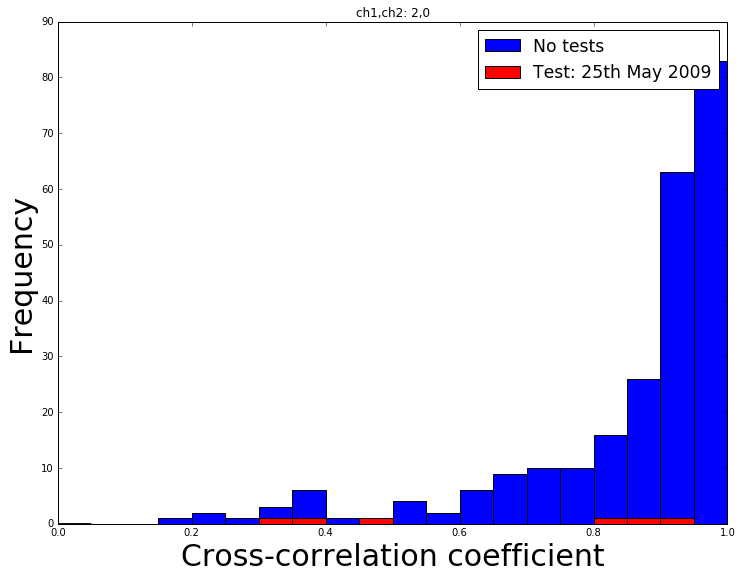

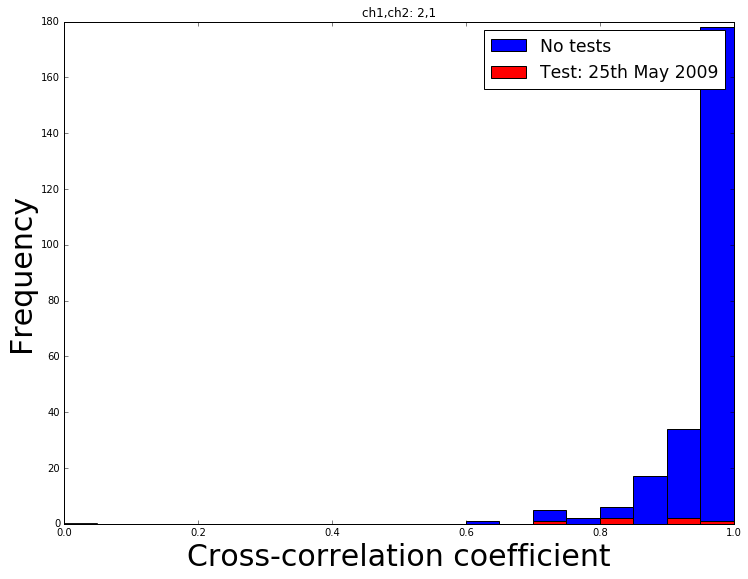

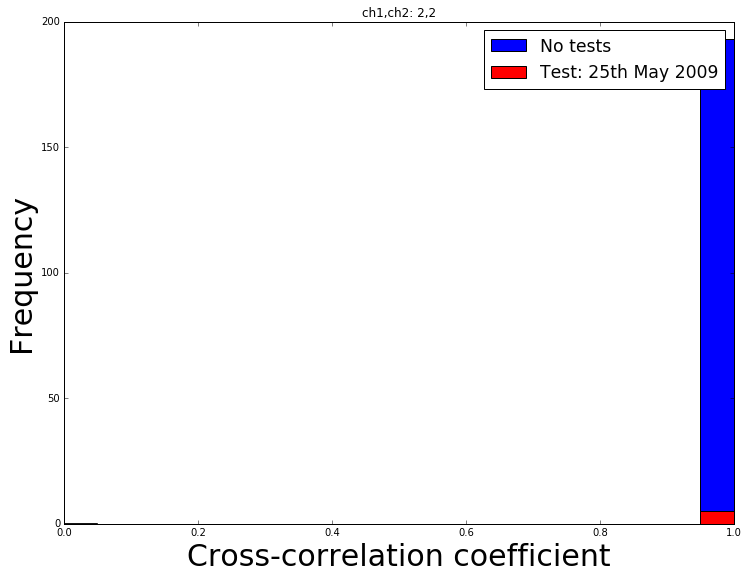

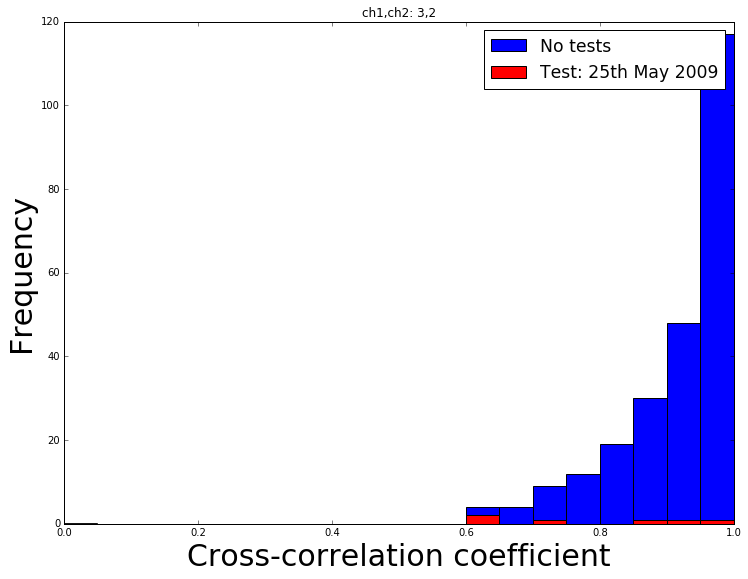

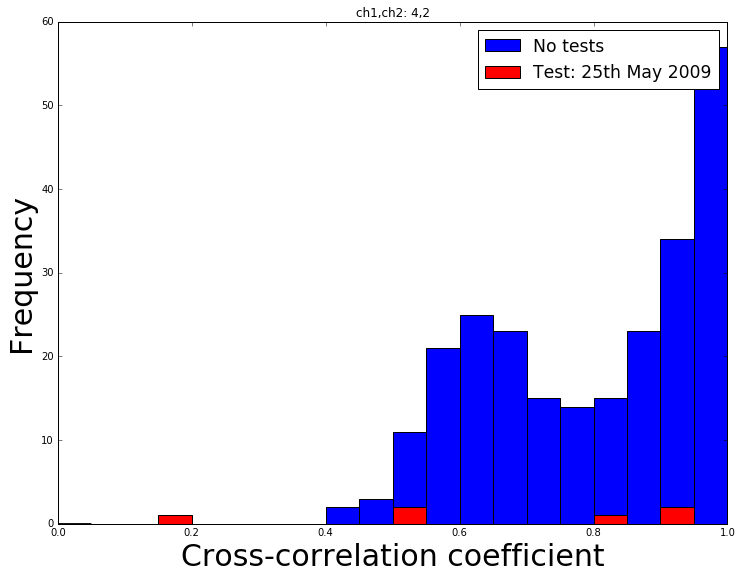

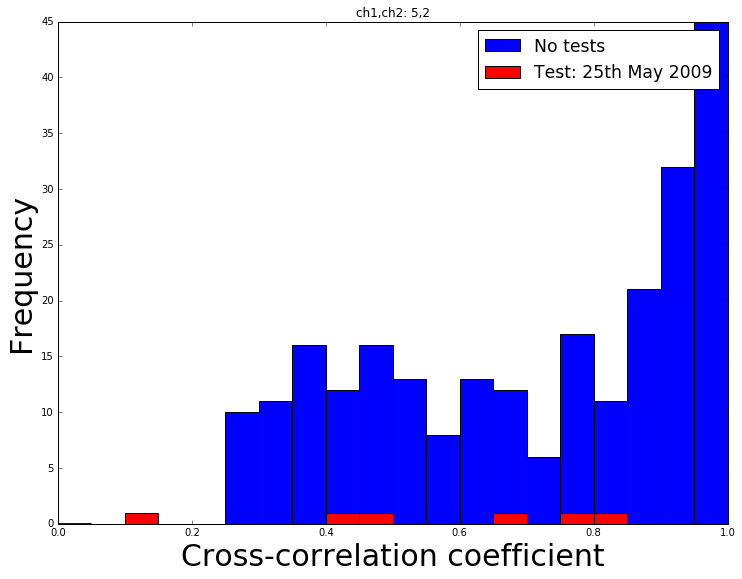

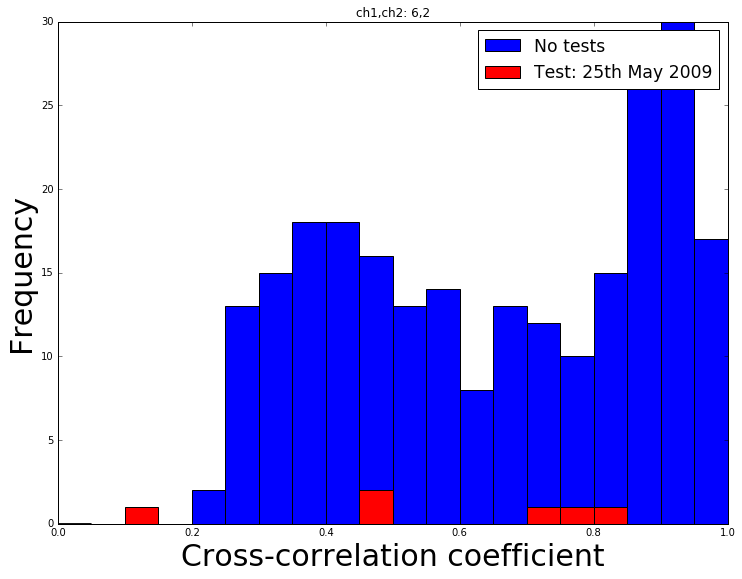

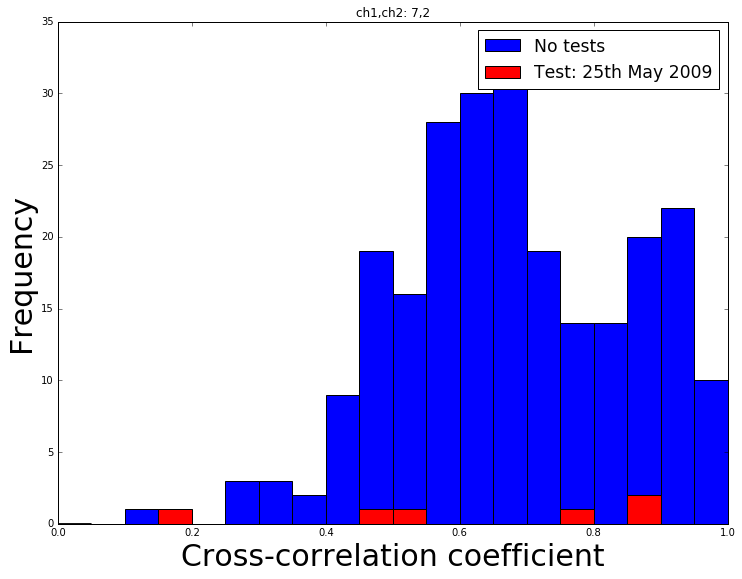

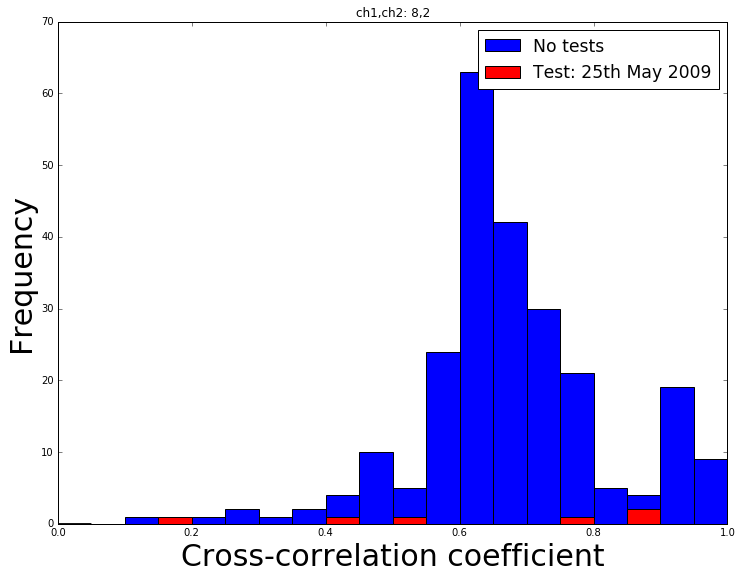

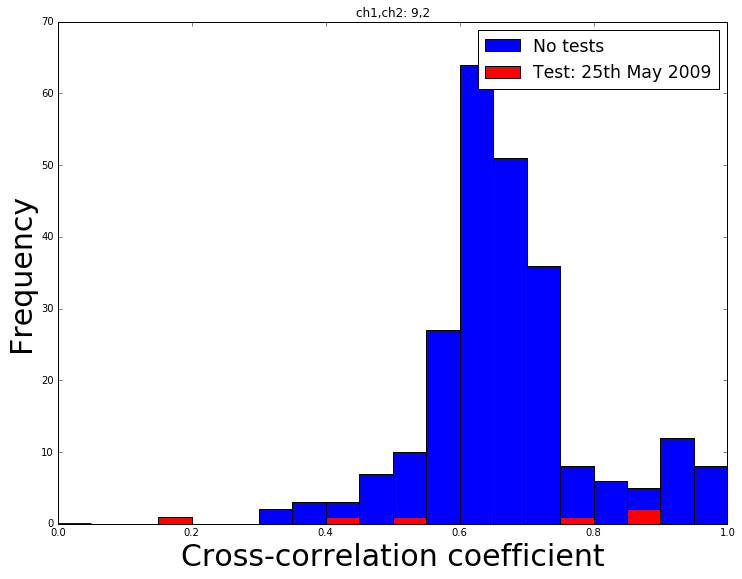

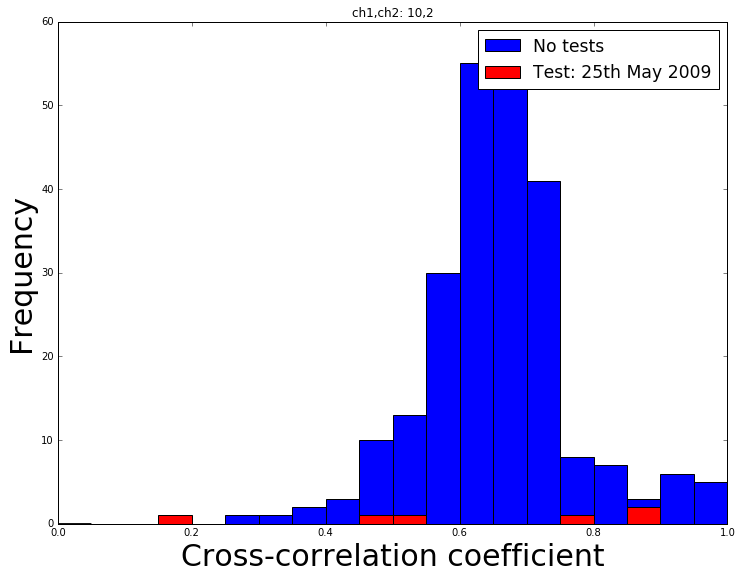

In [48]:
for ch1 in range(11):
    ch2=2
    if ch2<ch1:
        background.create_NK_plot(ch1,ch2,nkevent.correlation_matrix)
    else:
        background.create_NK_plot(ch2,ch1,nkevent.correlation_matrix)


In [49]:
background.create_corr_matrix(timedelta(hours=4))
nkevent.create_corr_matrix(timedelta(hours=4))


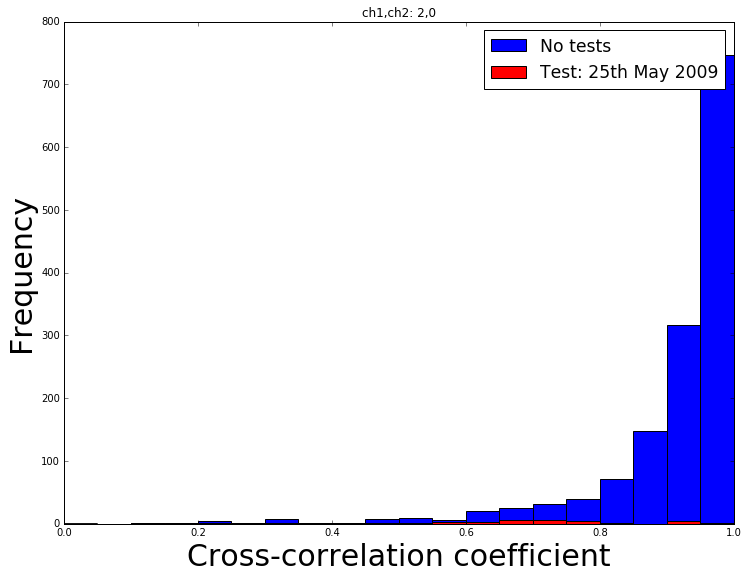

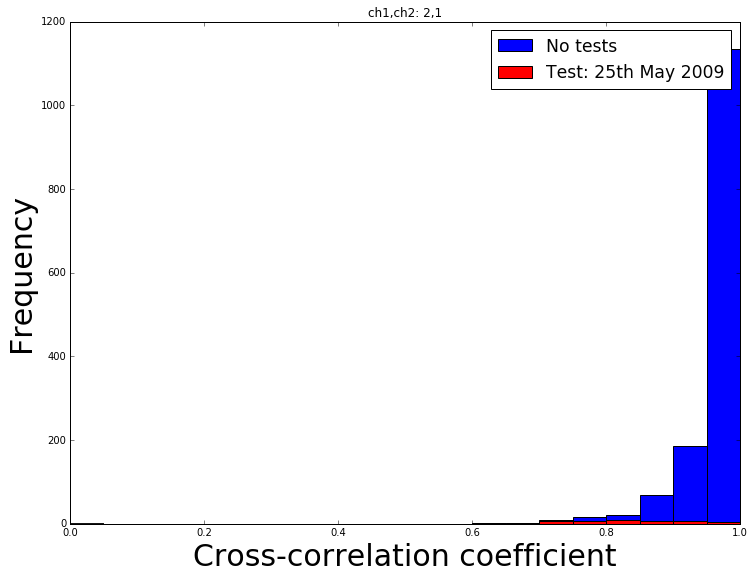

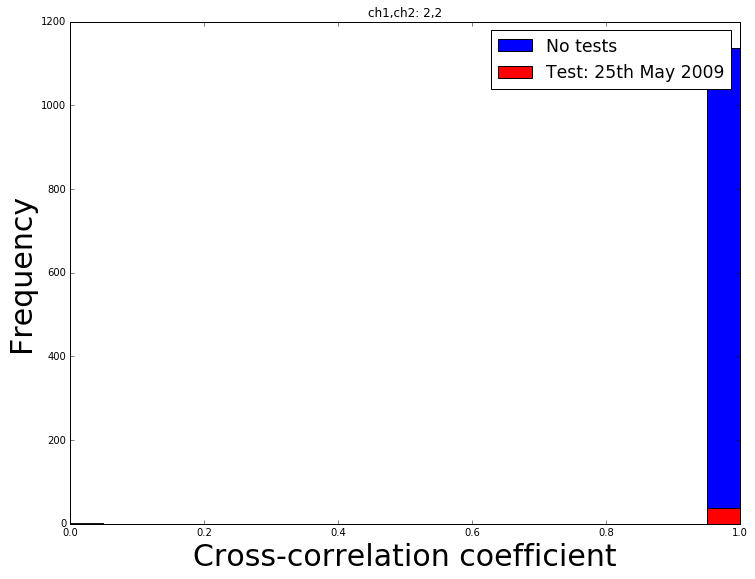

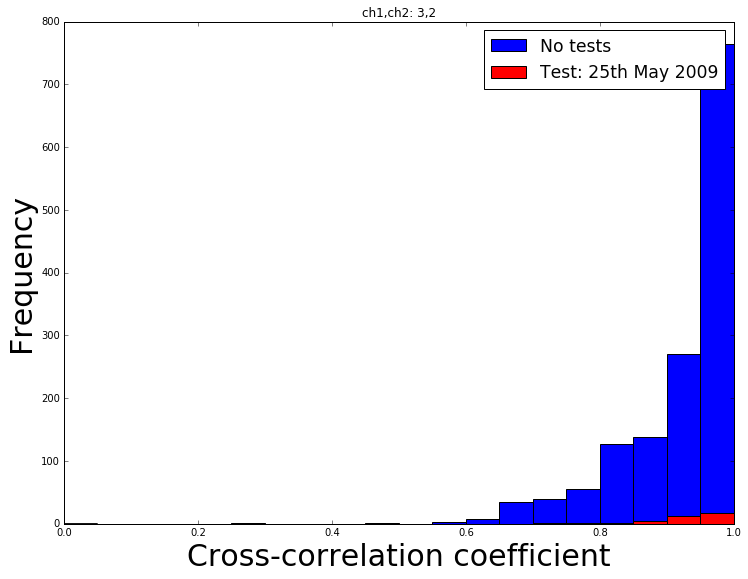

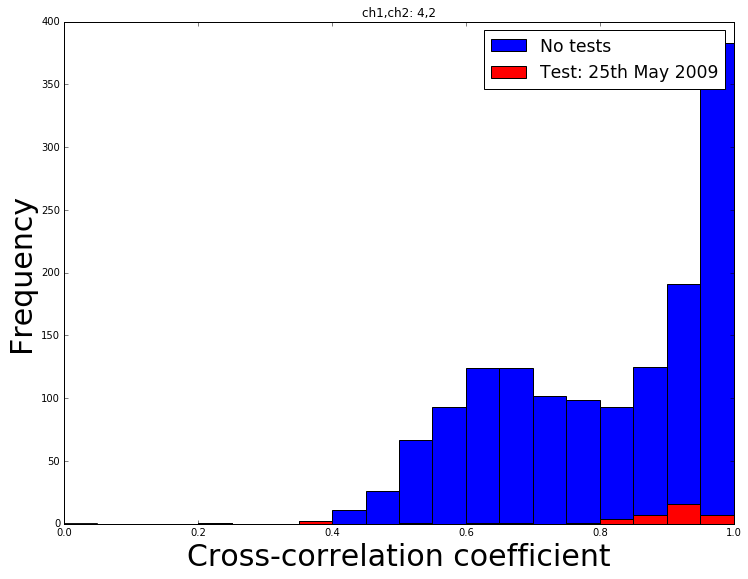

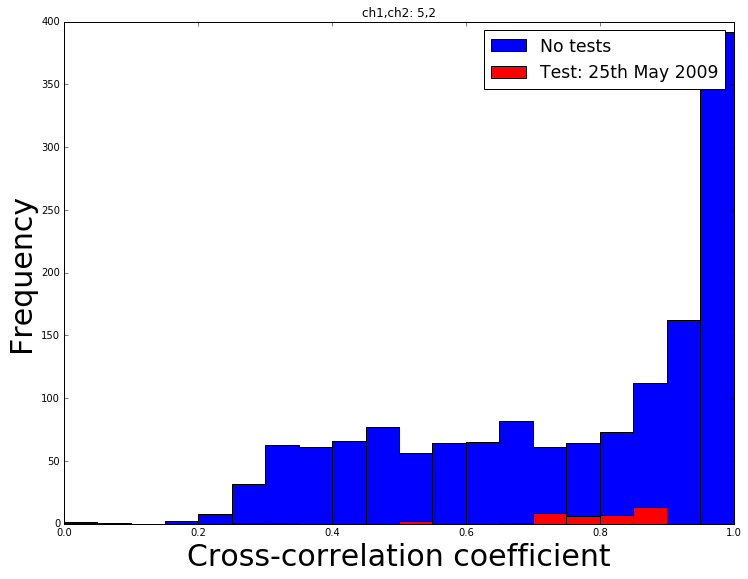

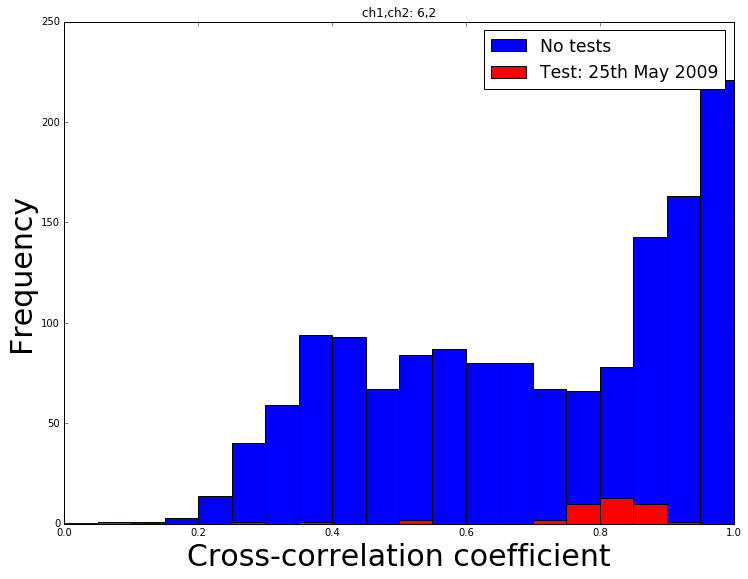

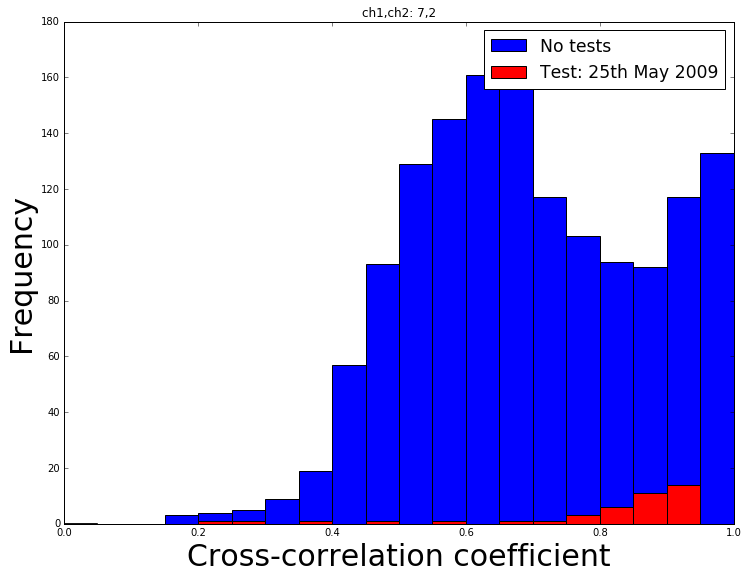

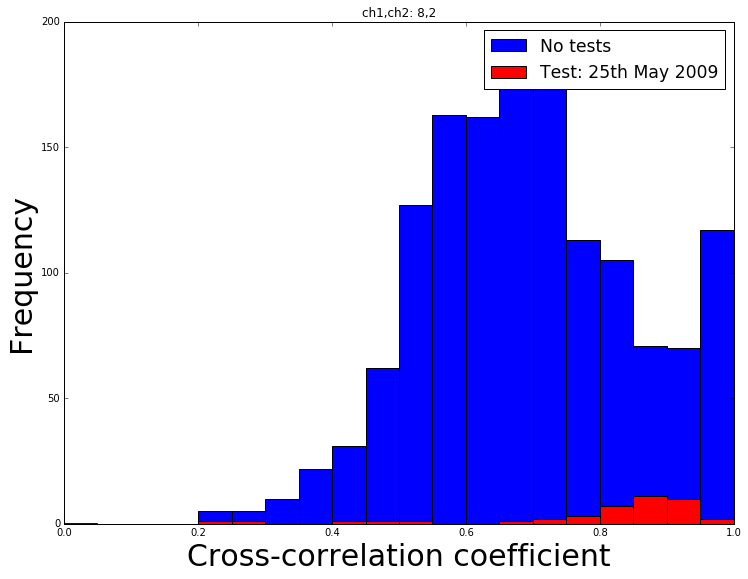

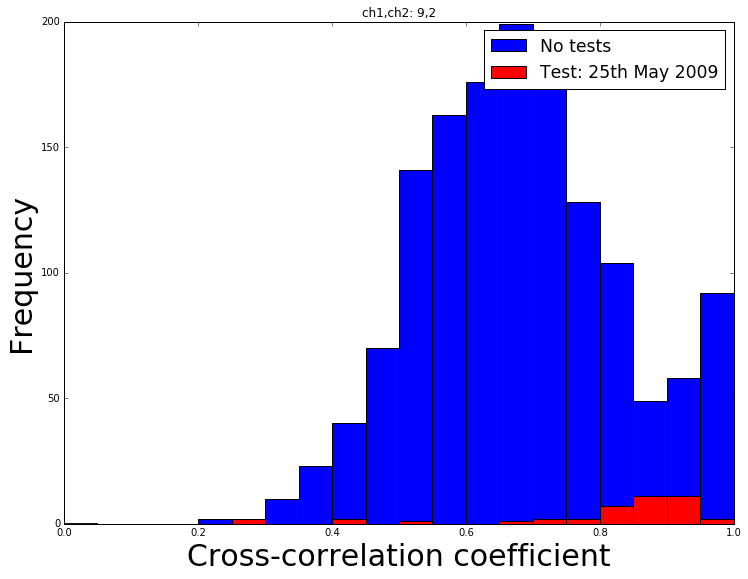

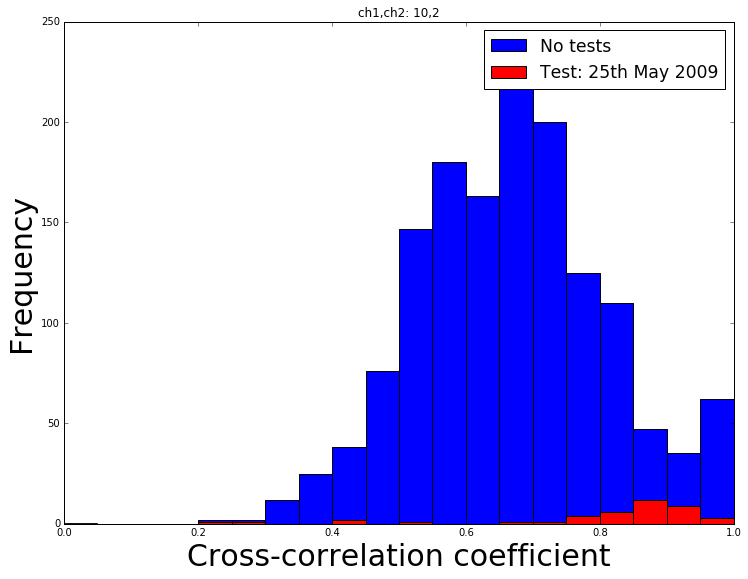

In [50]:
for ch1 in range(11):
    ch2=2
    if ch2<ch1:
        background.create_NK_plot(ch1,ch2,nkevent.correlation_matrix)
    else:
        background.create_NK_plot(ch2,ch1,nkevent.correlation_matrix)

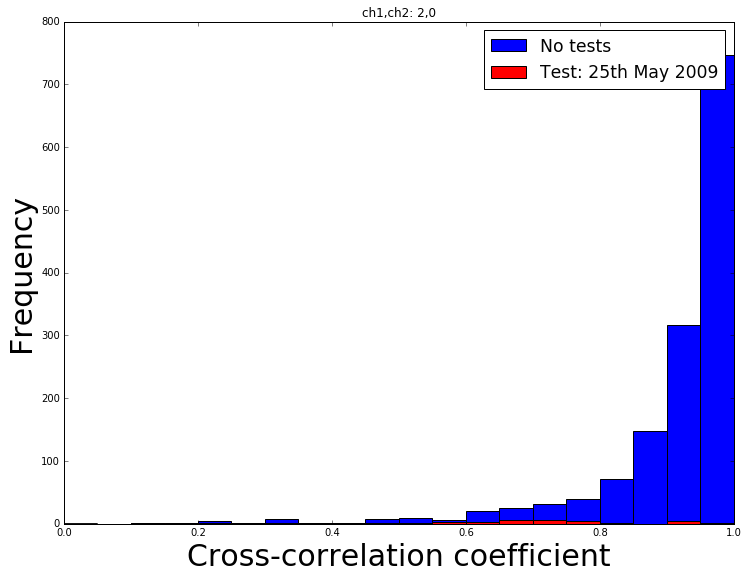

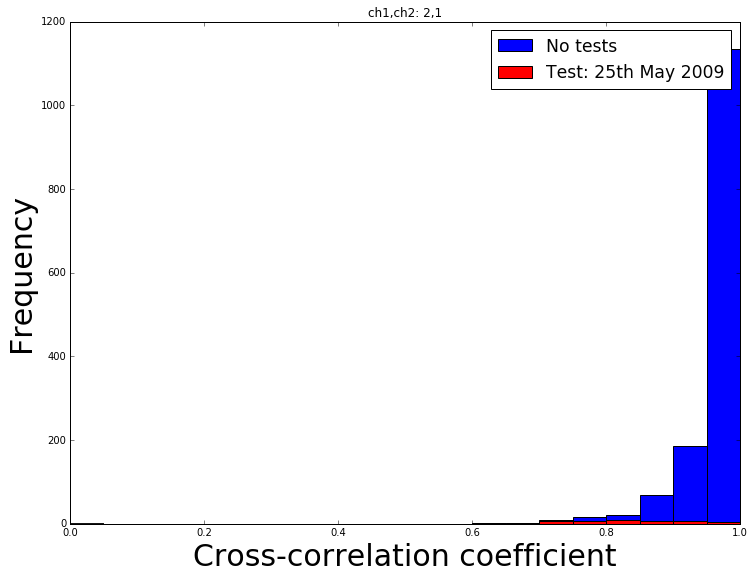

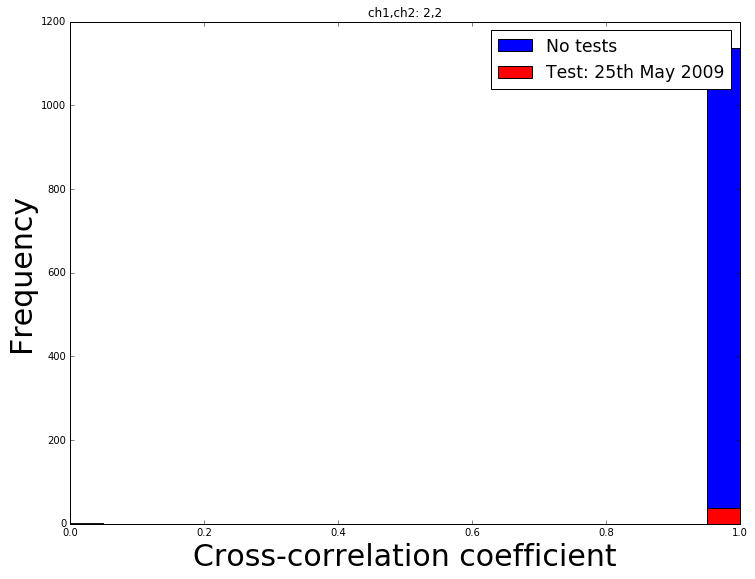

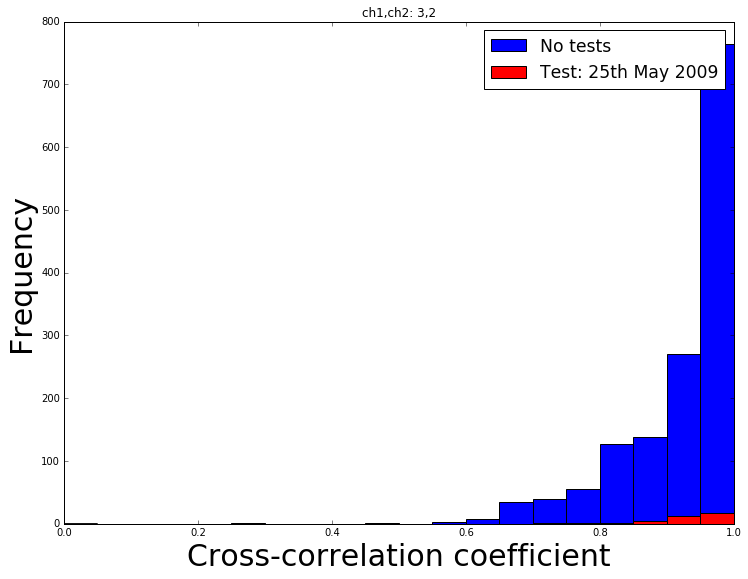

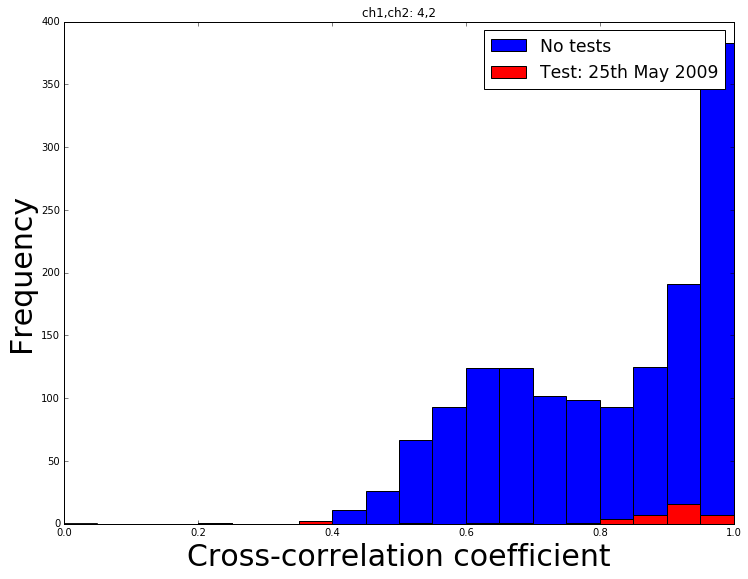

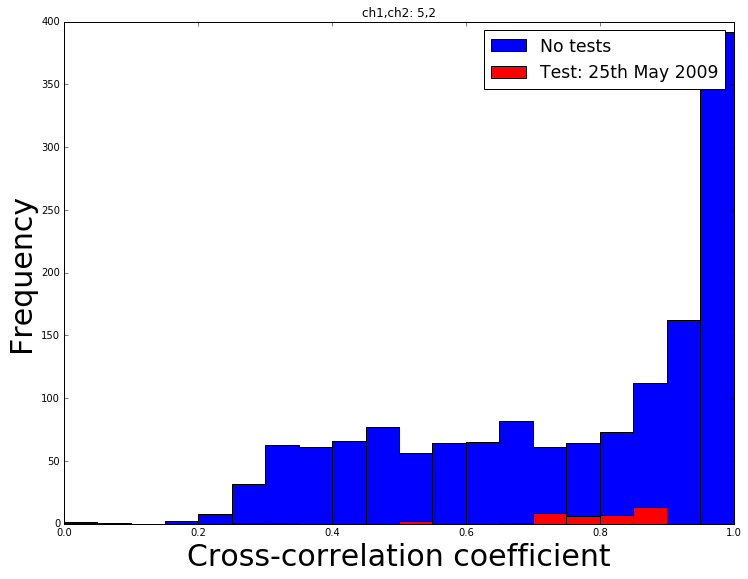

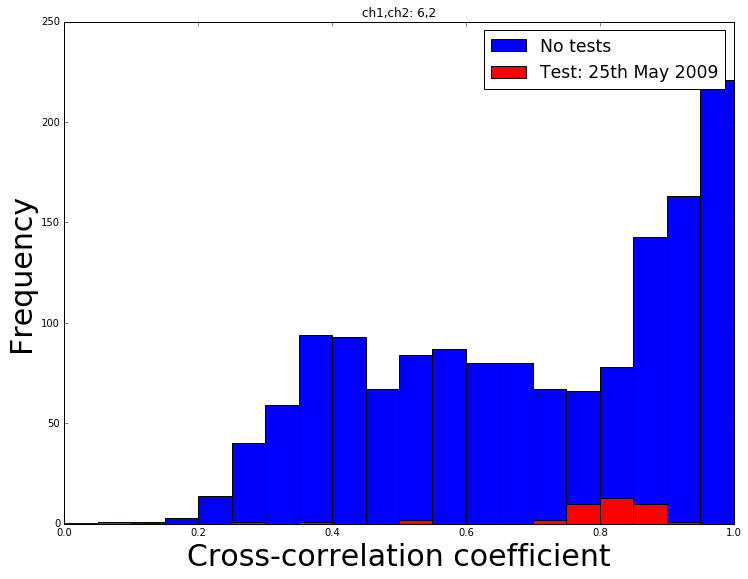

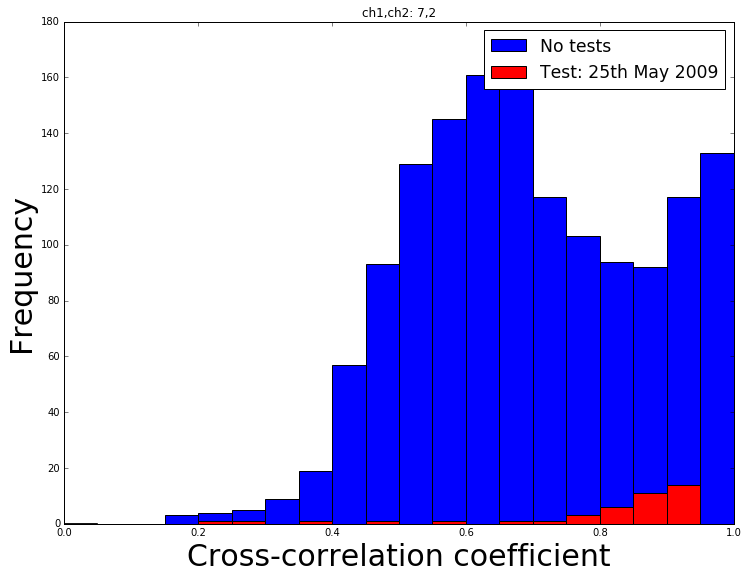

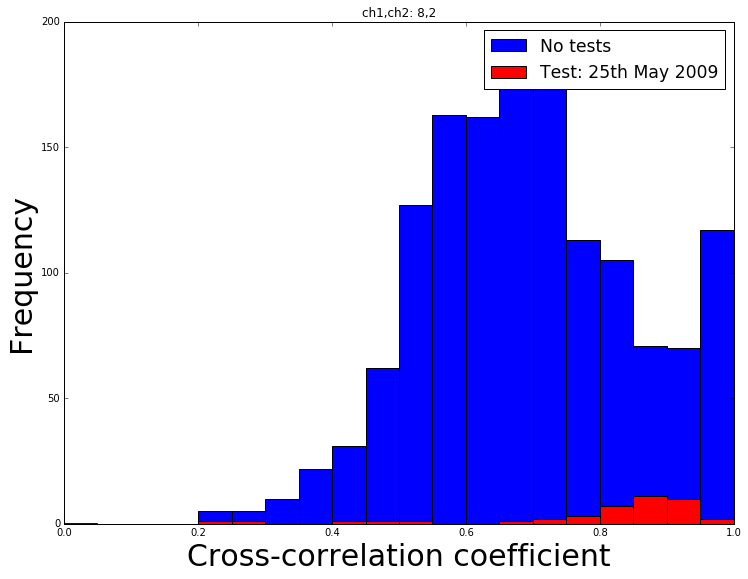

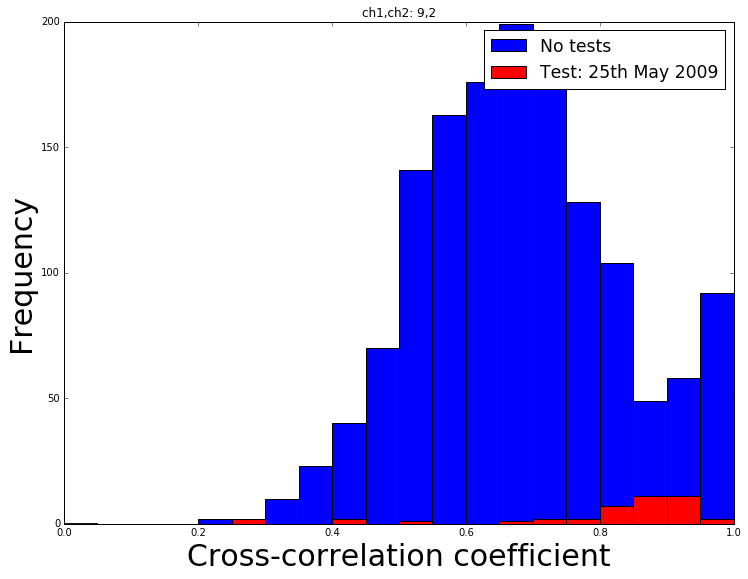

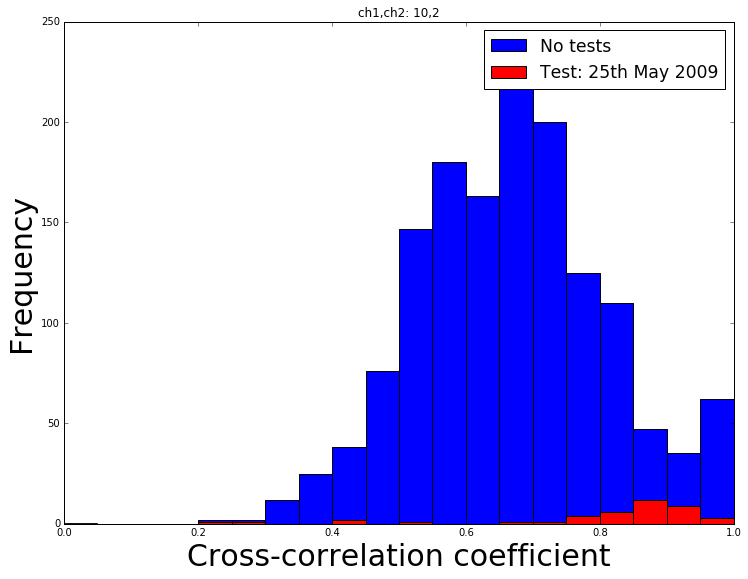

In [51]:
background.create_corr_matrix(timedelta(hours=4))
nkevent.create_corr_matrix(timedelta(hours=4))
for ch1 in range(11):
    ch2=2
    if ch2<ch1:
        background.create_NK_plot(ch1,ch2,nkevent.correlation_matrix)
    else:
        background.create_NK_plot(ch2,ch1,nkevent.correlation_matrix)

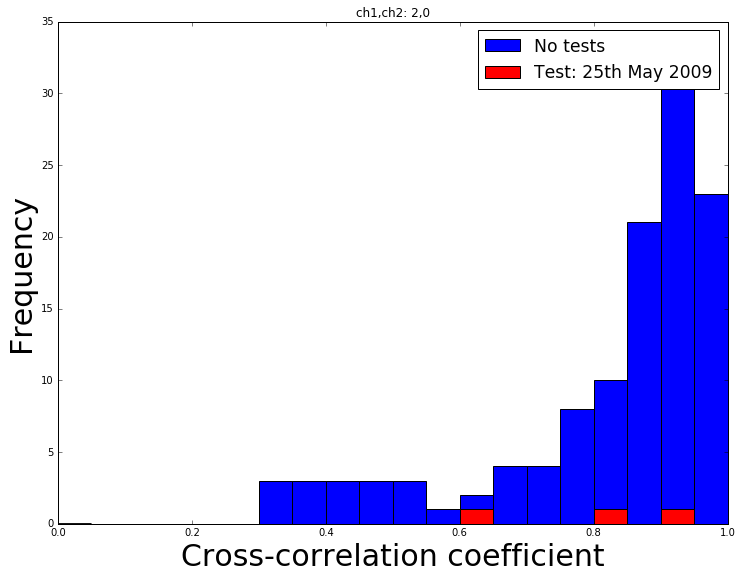

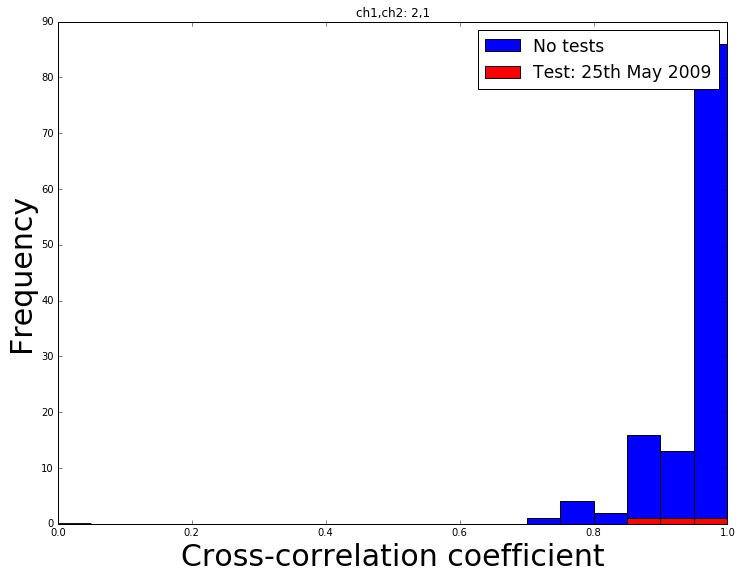

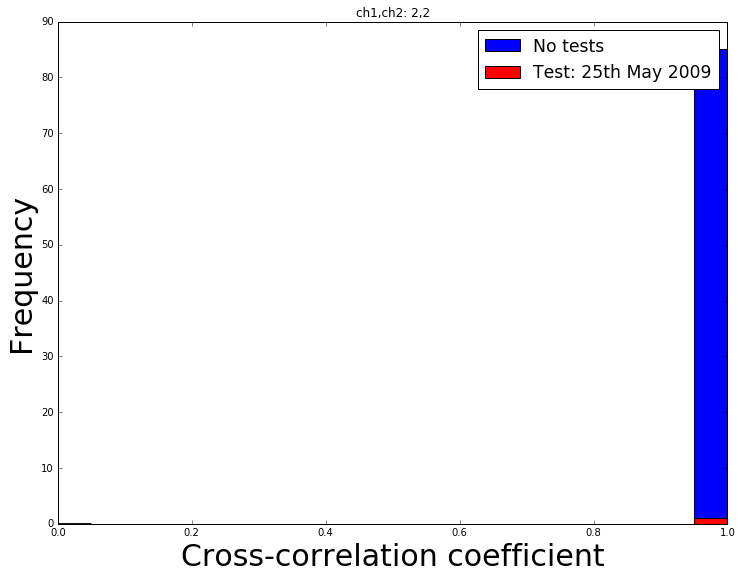

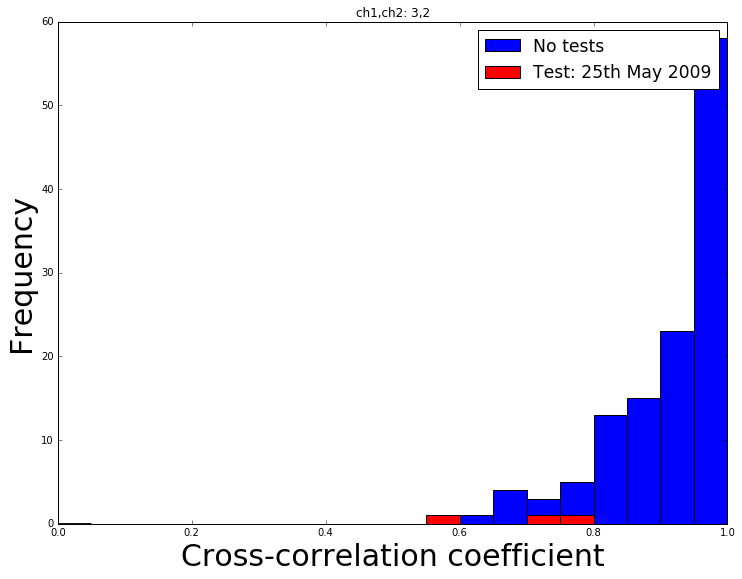

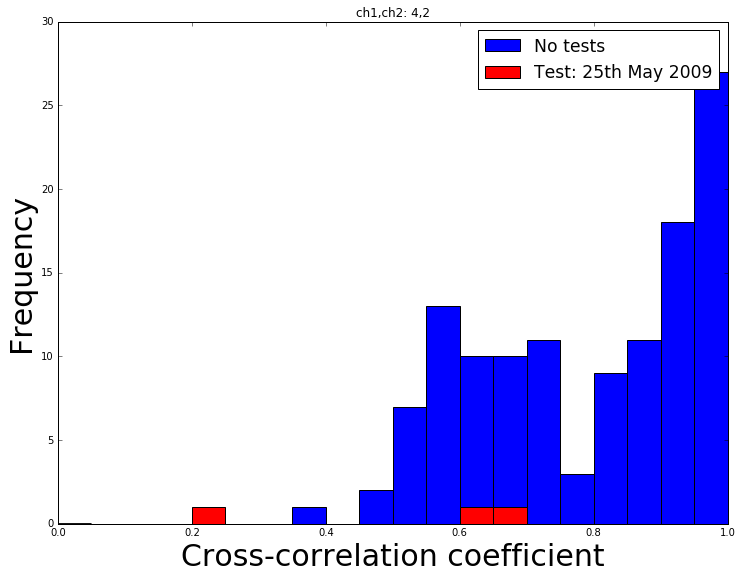

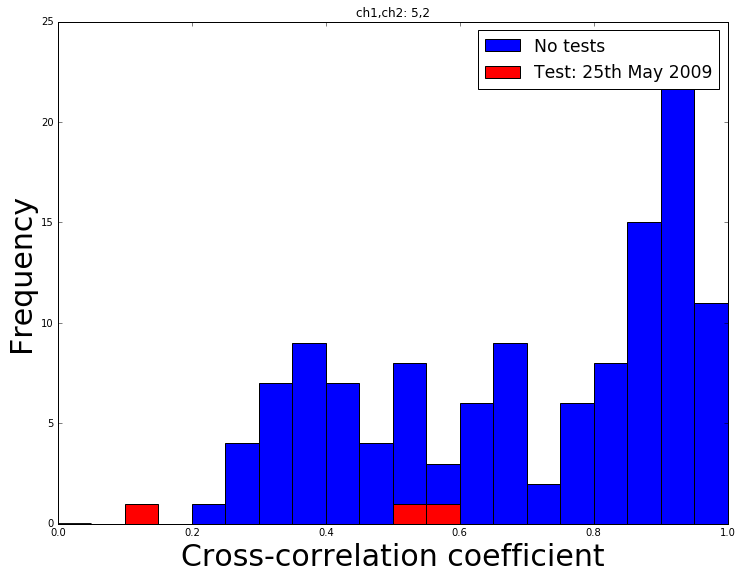

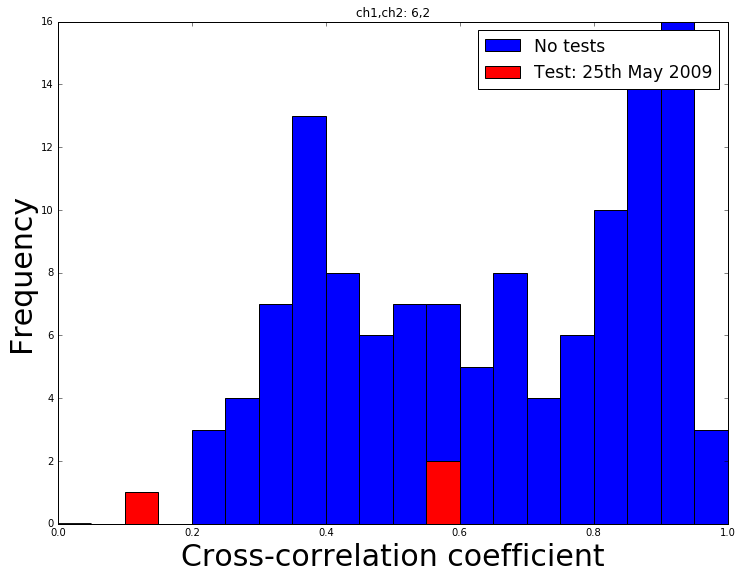

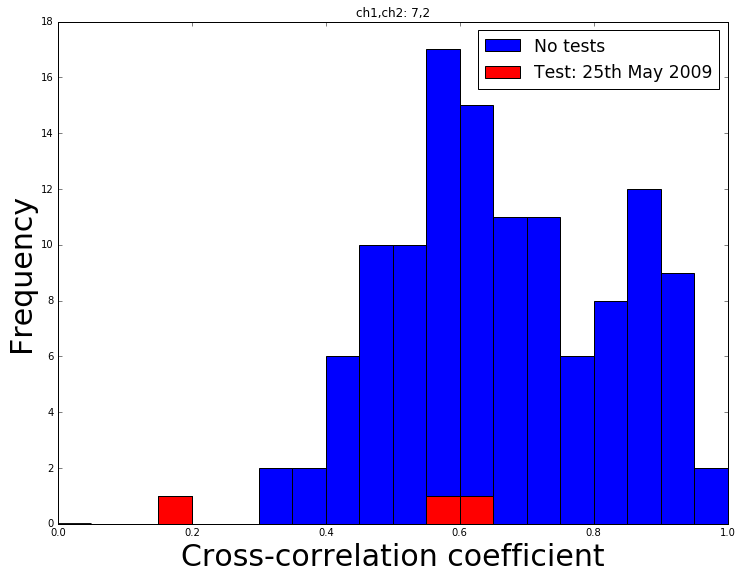

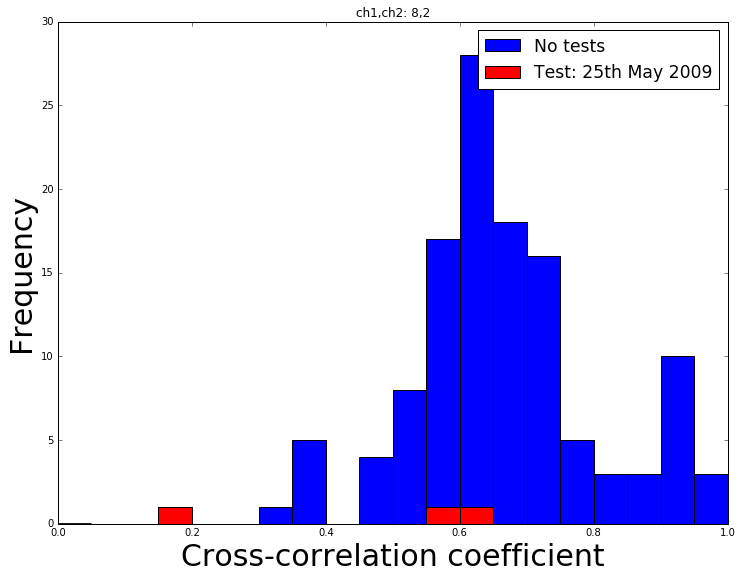

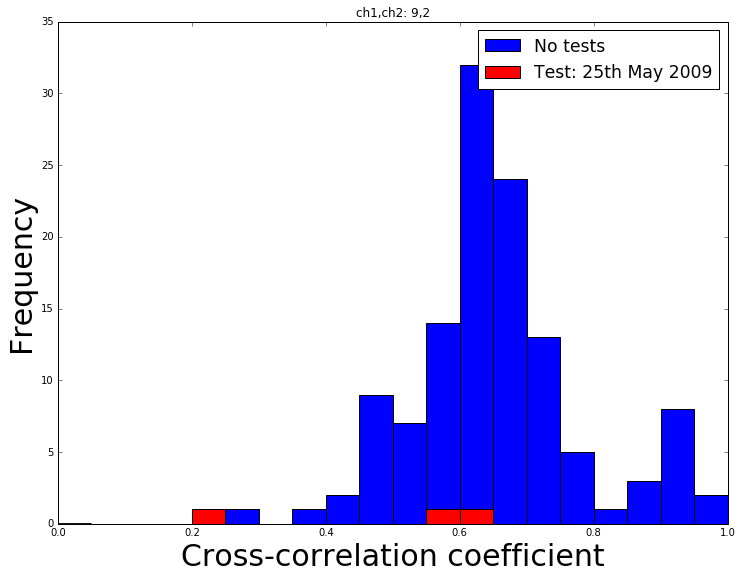

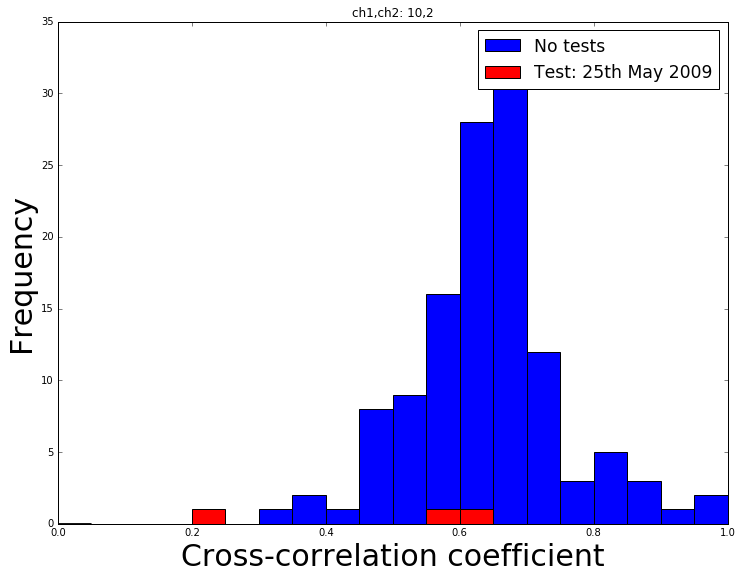

In [52]:
background.create_corr_matrix(timedelta(days=2))
nkevent.create_corr_matrix(timedelta(days=2))
for ch1 in range(11):
    ch2=2
    if ch2<ch1:
        background.create_NK_plot(ch1,ch2,nkevent.correlation_matrix)
    else:
        background.create_NK_plot(ch2,ch1,nkevent.correlation_matrix)

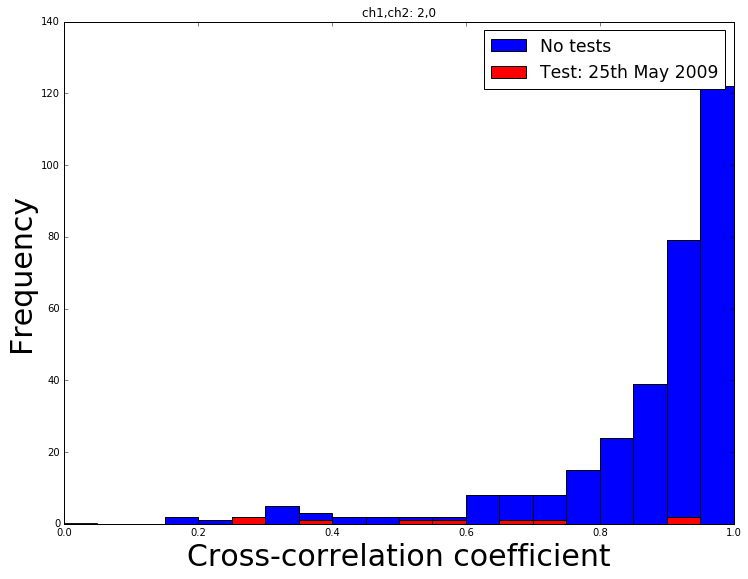

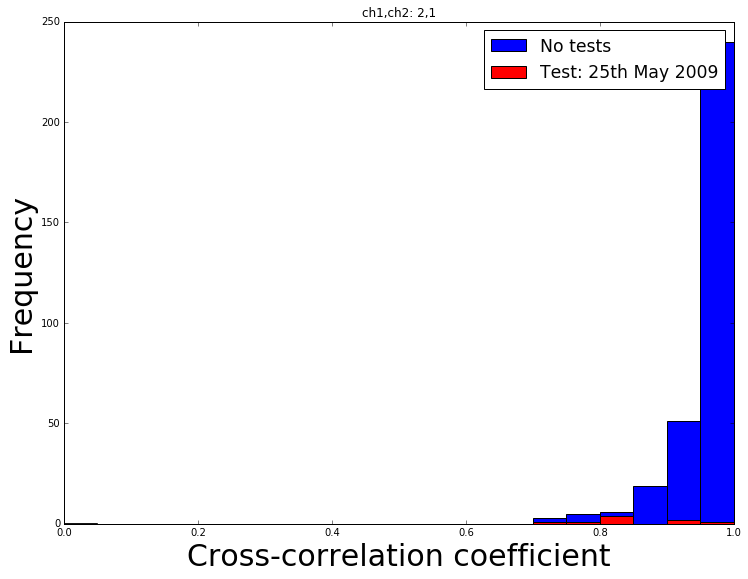

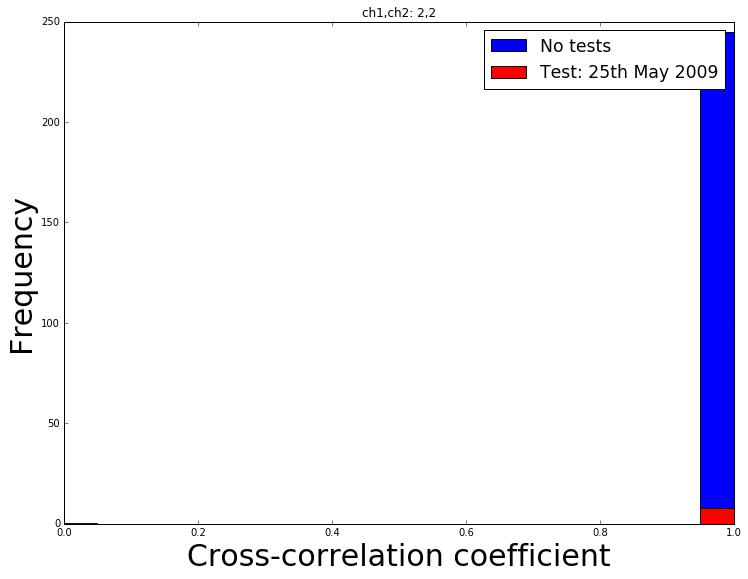

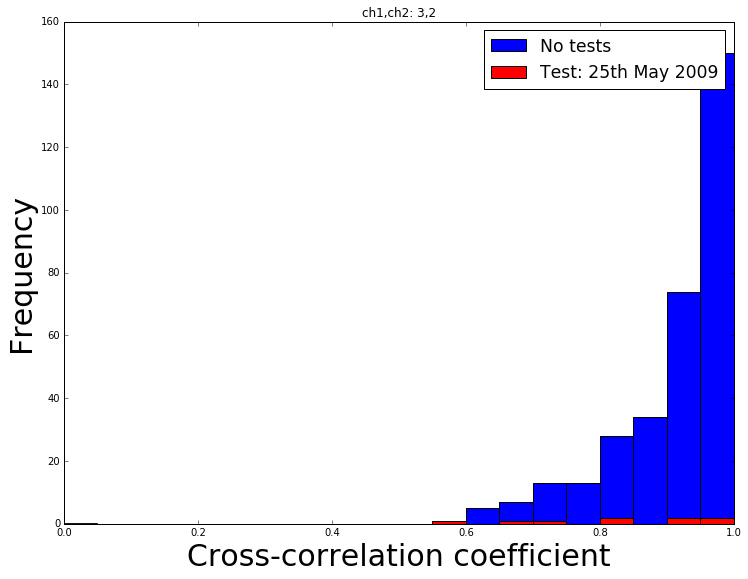

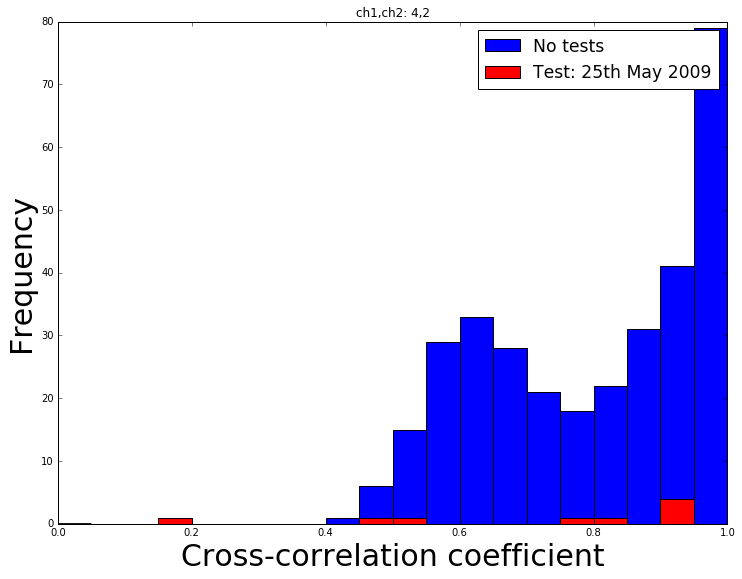

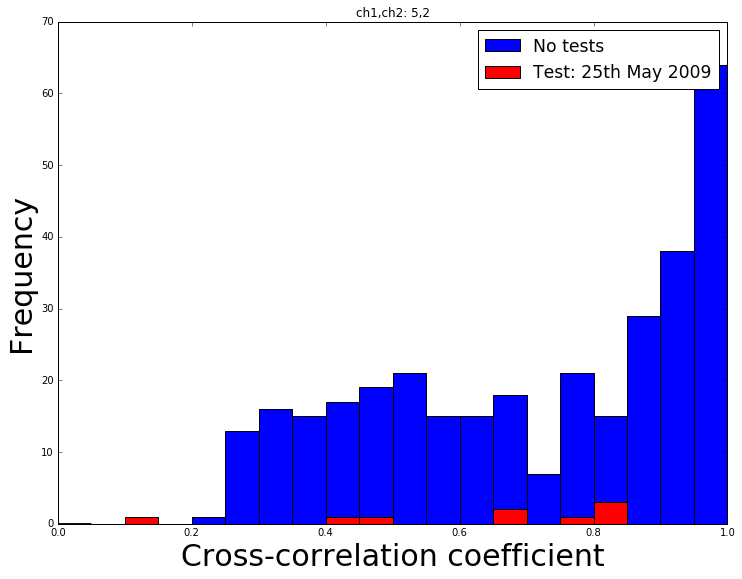

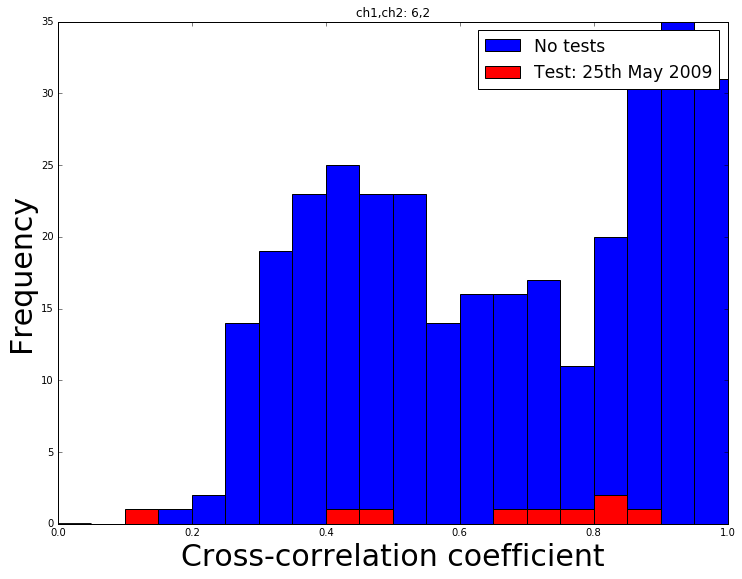

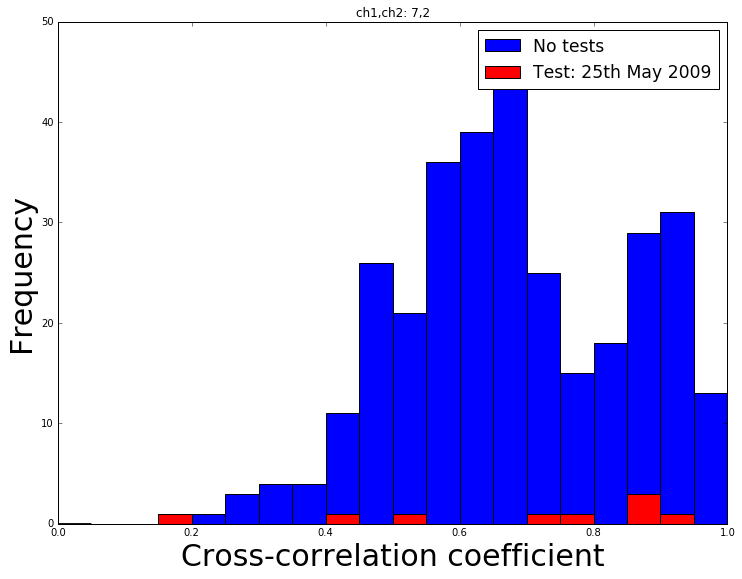

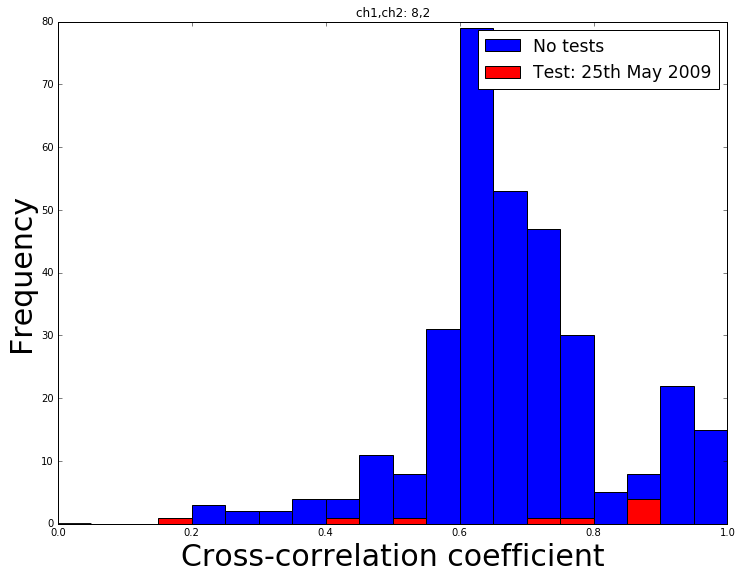

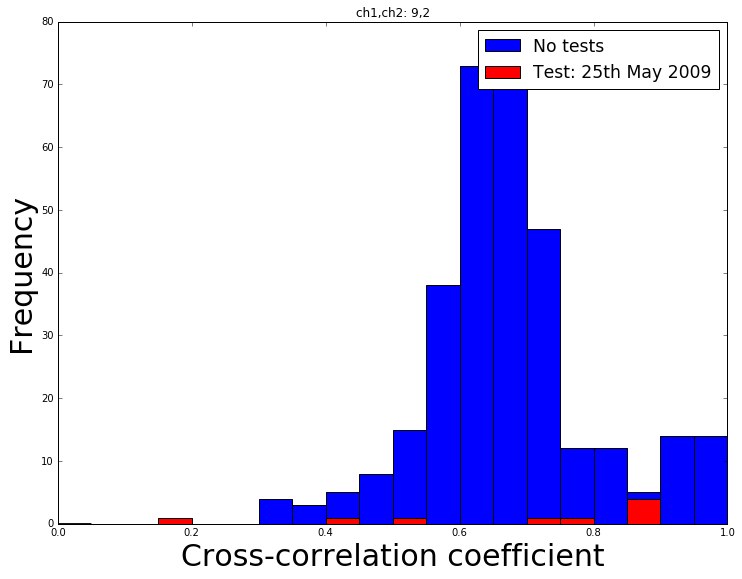

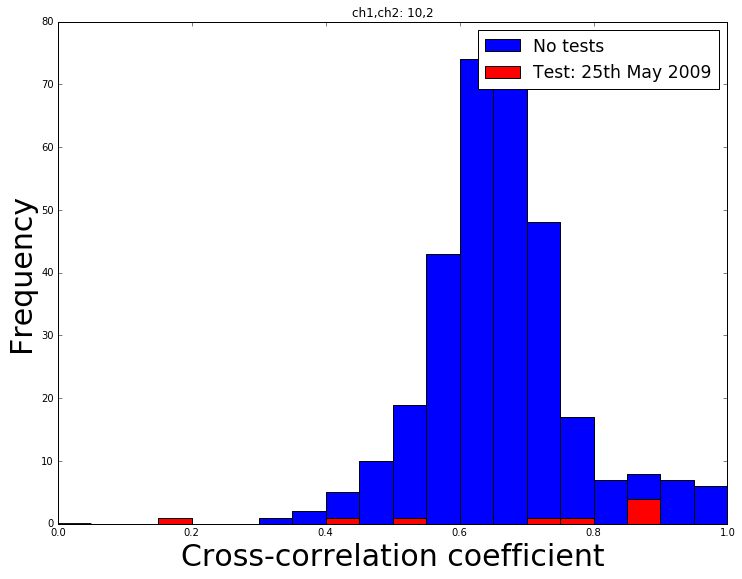

In [53]:
background.create_corr_matrix(timedelta(hours=18))
nkevent.create_corr_matrix(timedelta(hours=18))
for ch1 in range(11):
    ch2=2
    if ch2<ch1:
        background.create_NK_plot(ch1,ch2,nkevent.correlation_matrix)
    else:
        background.create_NK_plot(ch2,ch1,nkevent.correlation_matrix)

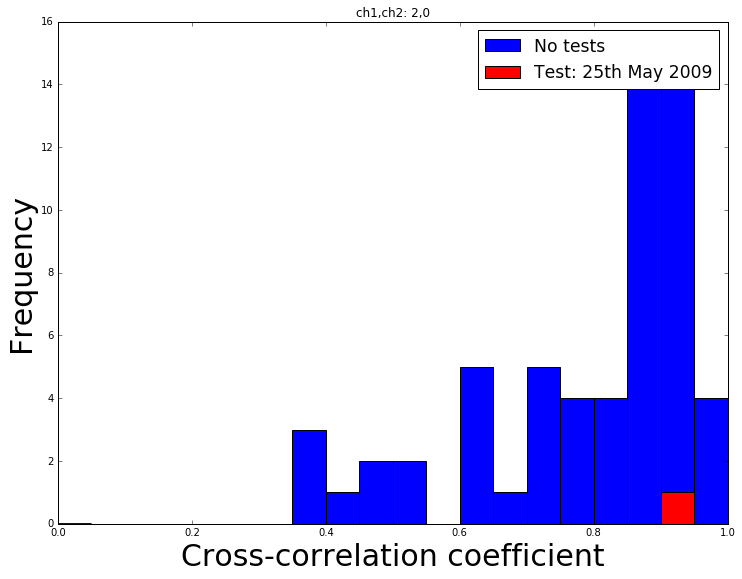

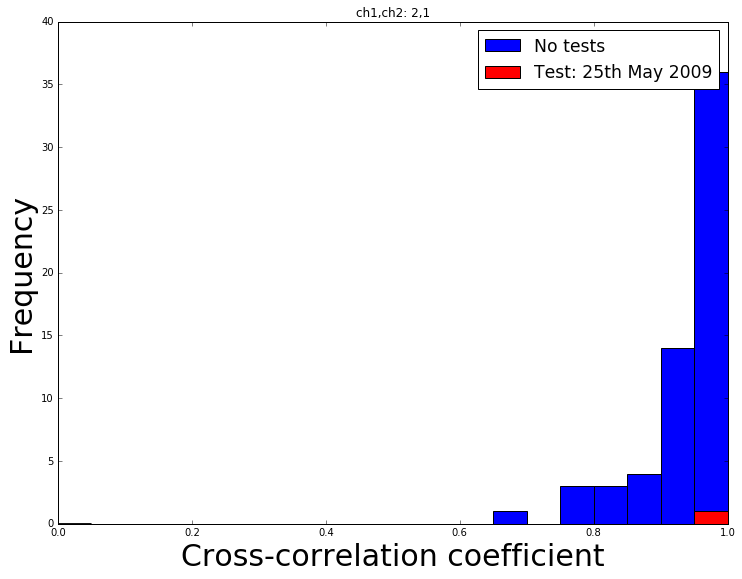

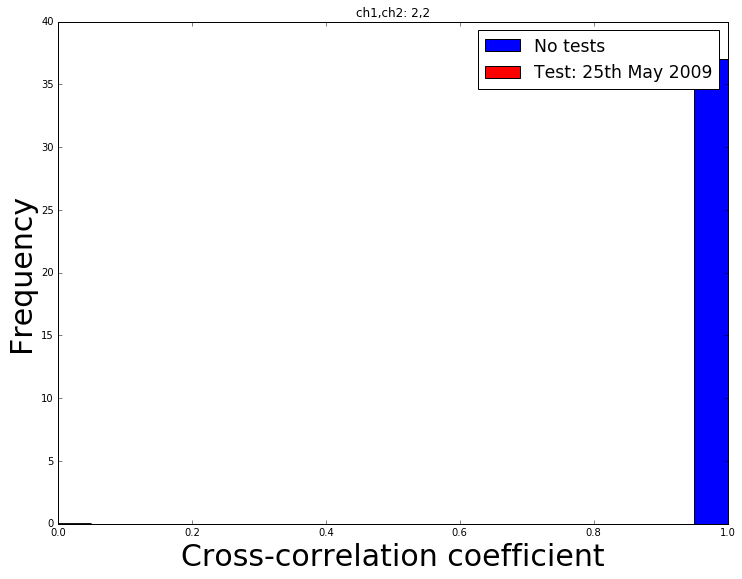

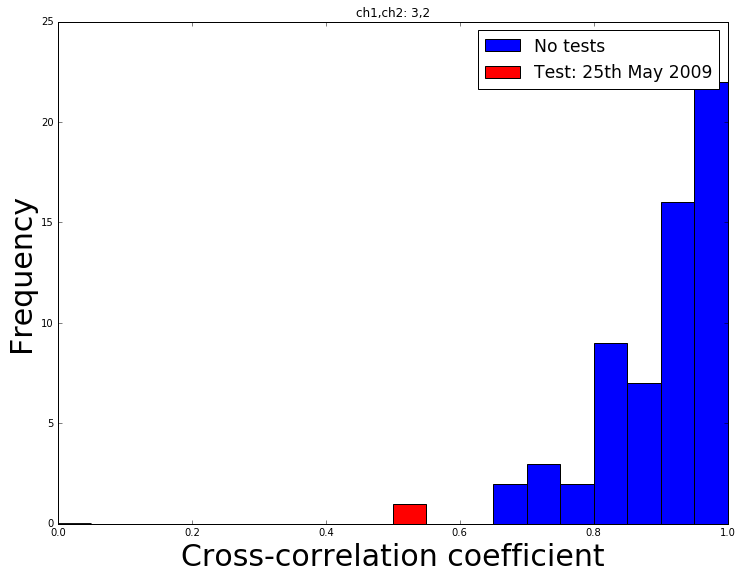

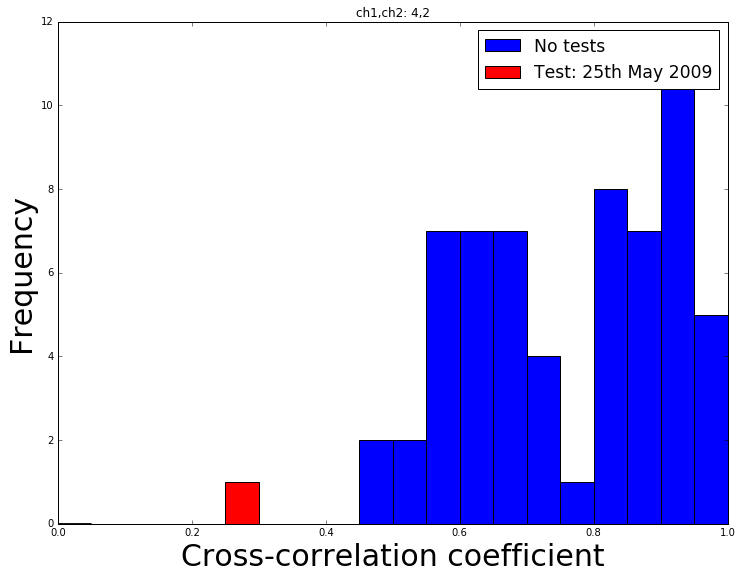

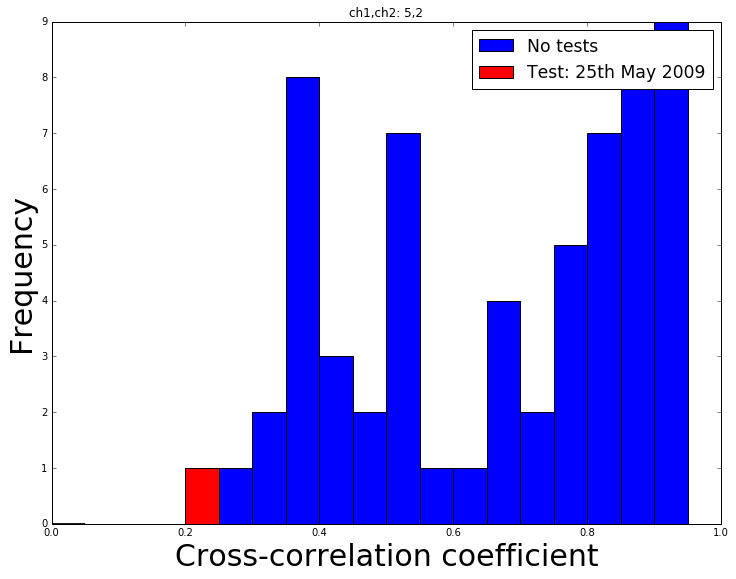

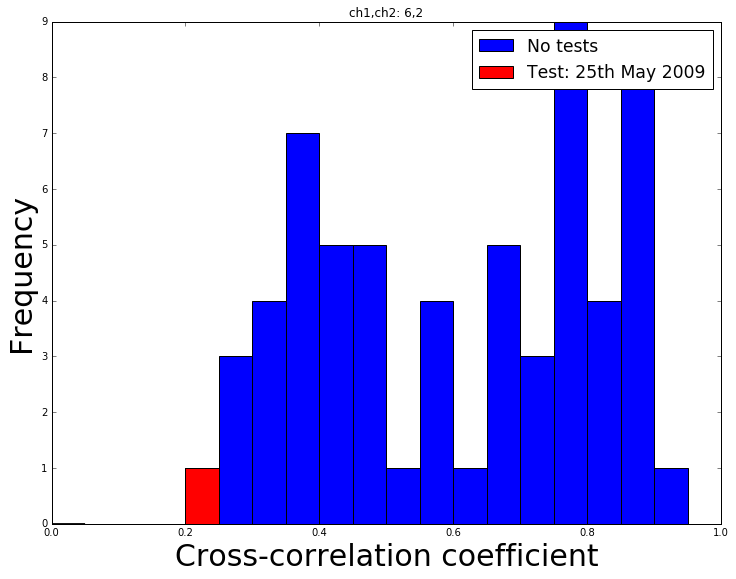

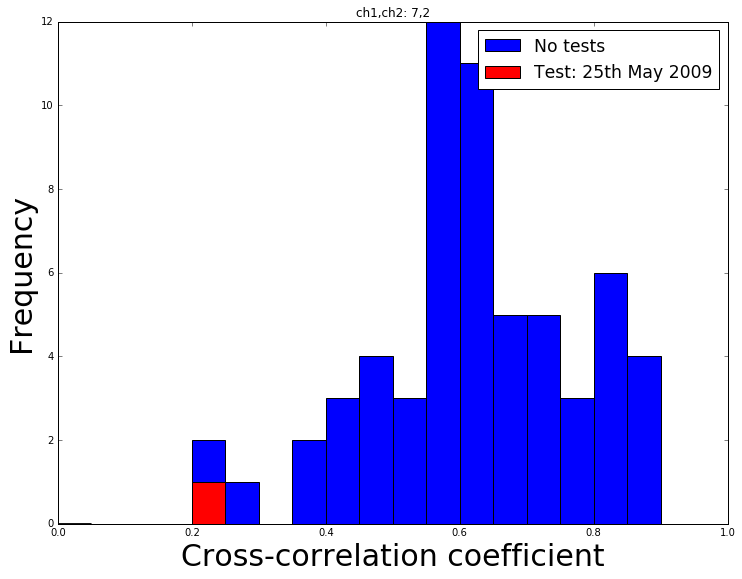

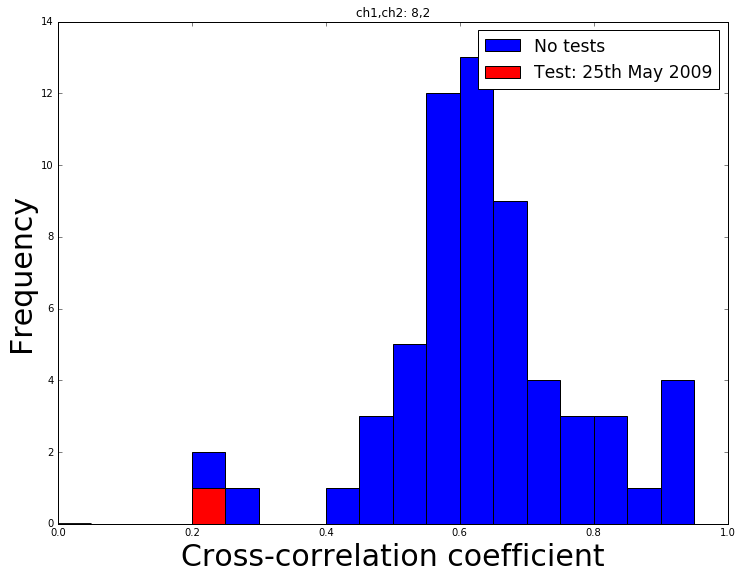

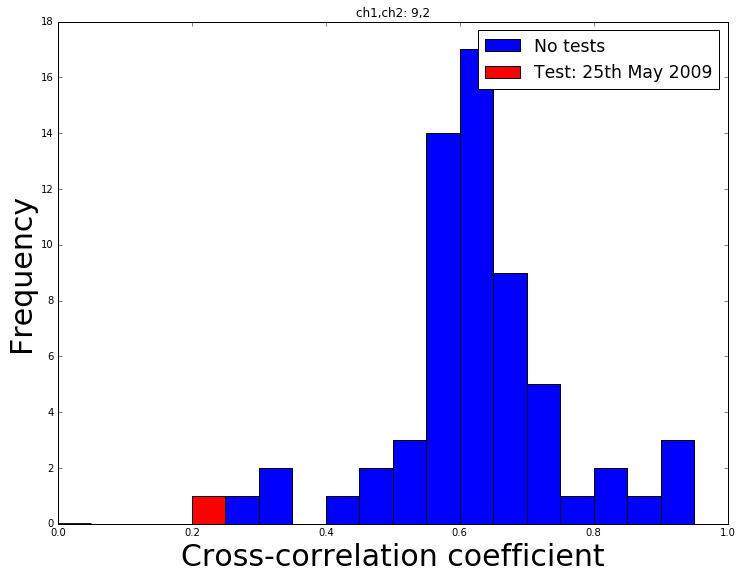

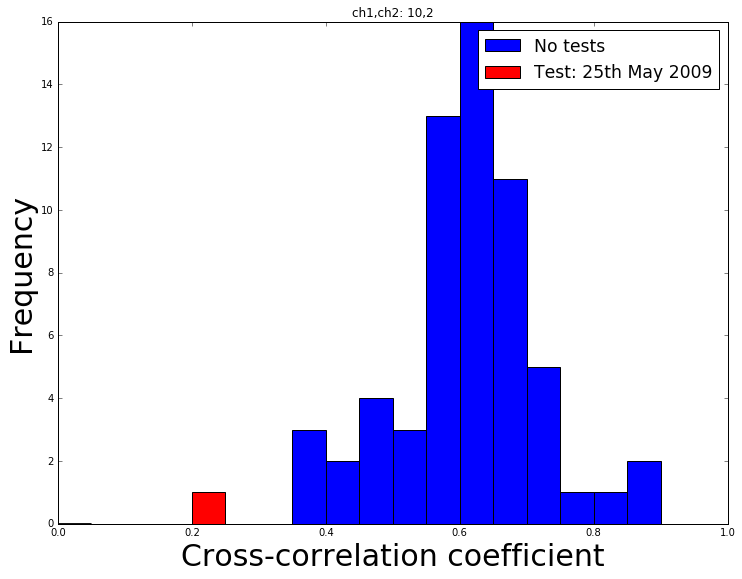

In [54]:
background.create_corr_matrix(timedelta(days=4))
nkevent.create_corr_matrix(timedelta(days=4))
for ch1 in range(11):
    ch2=2
    if ch2<ch1:
        background.create_NK_plot(ch1,ch2,nkevent.correlation_matrix)
    else:
        background.create_NK_plot(ch2,ch1,nkevent.correlation_matrix)